
# **EARIN exercise 5: Artificial Neural Networks**

Implementation of an N-layer perceptron for Iris classification

Authors: *Julia Czmut*, *Laura Ploch*

### Overview of the task

The goal of this task is to implement an N-layer perceptron and verify how number of layers affects final metrics of Iris classification.

The neural networks in our task are implemented with the help of Pytorch library, and they are all trained with the stochastic gradient descent optimizer.

## Dataset preprocessing

The Iris dataset is first uploaded as raw data from *Iris.csv* file.

Import modules:

In [32]:
import torch
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import torch.nn as nn
import torch.nn.functional as F
import csv
import numpy as np
import matplotlib.pyplot as plt

Upload the dataset source file

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


### Preprocessing details

The *IrisDataset* class stores our dataset and functions needed to prepare it. It inherits from the Pytorch *Dataset* class.

The structure which stores the Iris dataset is the *data* list. When we first load the data from the .csv file (in *load_data()* function), we read each line and only save attributes which are needed. These are: sepal length, sepal width, petal length, petal width and species. The id is not necessary, so we leave it out.

The species attribute contains categorical data, so we are using label encoding to encode it. Usually, one-hot encoding would be a better option for data which is not ordered, however the built-in *sklearn* Iris dataset used label encoding instead of one-hot encoding, so we also adopted this approach.

**Splitting the dataset into features and labels**

The next step of the dataset processing is splitting the dataset into X and Y for our classification task. It is done in *get_xy()* function of the IrisDataset class.

**Features** (**X**) attributes: **sepal length**, **sepal width**, **petal length** and **petal width**.

**Label** (**Y**) attribute which the models will predict: **species**. 

In [7]:
class IrisDataset(Dataset):
  def __init__(self):
    self.data = []
    self.load_data("Iris.csv")

  def __len__(self):
    return len(self.data[0])

  def __getitem__(self, index):
    return self.data[0][index], self.data[1][index]

  def load_data(self, file_name="Iris.csv"):
    with open("Iris.csv") as input_file:
      csv_reader = csv.reader(input_file, delimiter=',')
      next(csv_reader, None)

      print("Loading data from Iris.csv...")

      iris_data = []

      for line in csv_reader:
        assert len(line) == 6
        iris_record = []
        # reading the numeric attributes (except from id which is unnecessary)
        iris_record.append(float(line[1]))  # sepal length (cm)
        iris_record.append(float(line[2]))  # sepal width (cm)
        iris_record.append(float(line[3]))  # petal length (cm)
        iris_record.append(float(line[4]))  # petal width (cm)
    
        # label encoding for the species attributes
        species = line[5]
        if species == "Iris-setosa":
          species = 0
        elif species == "Iris-versicolor":
          species = 1
        elif species == "Iris-virginica":
          species = 2

        iris_record.append(species)
        iris_data.append(iris_record)

      self.data = iris_data
      print("Attributes before X-Y split:")
      print(self.data)
      self.data = self.get_xy()

  def get_xy(self):
    X_train = []  # features
    Y_train = []  # labels

    for i in range(len(self.data)):
      X_train.append(self.data[i][0:4])
      Y_train.append(self.data[i][4])

    return [X_train, Y_train]


**Initializing the dataset**

Here we see the dataset before splitting it into features and labels, so simply a list of samples, where each sample is a 5-element attribute list, and then the dataset after the split, so a two element list [X, Y], where X is a list of lists of samples' features, and Y is a list of samples' labels (encoded species attribute).

In [8]:
dataset = IrisDataset()
print("After X-Y split:")
print(dataset.data)

Loading data from Iris.csv...
Attributes before X-Y split:
[[5.1, 3.5, 1.4, 0.2, 0], [4.9, 3.0, 1.4, 0.2, 0], [4.7, 3.2, 1.3, 0.2, 0], [4.6, 3.1, 1.5, 0.2, 0], [5.0, 3.6, 1.4, 0.2, 0], [5.4, 3.9, 1.7, 0.4, 0], [4.6, 3.4, 1.4, 0.3, 0], [5.0, 3.4, 1.5, 0.2, 0], [4.4, 2.9, 1.4, 0.2, 0], [4.9, 3.1, 1.5, 0.1, 0], [5.4, 3.7, 1.5, 0.2, 0], [4.8, 3.4, 1.6, 0.2, 0], [4.8, 3.0, 1.4, 0.1, 0], [4.3, 3.0, 1.1, 0.1, 0], [5.8, 4.0, 1.2, 0.2, 0], [5.7, 4.4, 1.5, 0.4, 0], [5.4, 3.9, 1.3, 0.4, 0], [5.1, 3.5, 1.4, 0.3, 0], [5.7, 3.8, 1.7, 0.3, 0], [5.1, 3.8, 1.5, 0.3, 0], [5.4, 3.4, 1.7, 0.2, 0], [5.1, 3.7, 1.5, 0.4, 0], [4.6, 3.6, 1.0, 0.2, 0], [5.1, 3.3, 1.7, 0.5, 0], [4.8, 3.4, 1.9, 0.2, 0], [5.0, 3.0, 1.6, 0.2, 0], [5.0, 3.4, 1.6, 0.4, 0], [5.2, 3.5, 1.5, 0.2, 0], [5.2, 3.4, 1.4, 0.2, 0], [4.7, 3.2, 1.6, 0.2, 0], [4.8, 3.1, 1.6, 0.2, 0], [5.4, 3.4, 1.5, 0.4, 0], [5.2, 4.1, 1.5, 0.1, 0], [5.5, 4.2, 1.4, 0.2, 0], [4.9, 3.1, 1.5, 0.1, 0], [5.0, 3.2, 1.2, 0.2, 0], [5.5, 3.5, 1.3, 0.2, 0], [4.9, 3.1, 1.5,

**Splitting the dataset**

The next step is splitting the dataset into three sets: training, validation and test set.

The first split on the dataset creates the **validation set** of **10 samples** and leaves **140 remaining** samples for the train-test split.

The training-test split is done in **80/20** proportions, which gives us **112 training samples** and **28 test samples**.



In [9]:
validation_set, remaining = torch.utils.data.random_split(dataset, [10, int((dataset.__len__())-10)])   # 10 samples for validation
print(str(len(validation_set)) + " validation samples.")
print(str(len(remaining)) + " remaining samples.")

10 validation samples.
140 remaining samples.


In [10]:
lengths = [int(len(remaining)*0.8), int(len(remaining)*0.2)]  # 80/20 split
training_set, test_set = torch.utils.data.random_split(remaining, lengths)
print(str(len(training_set)) + " training samples.")
print(str(len(test_set)) + " test samples.")

112 training samples.
28 test samples.


Initializing DataLoader iterator objects for our dataset:

In [11]:
train_iterator = DataLoader(training_set)   # no batches since the dataset is very small
validation_iterator = DataLoader(validation_set)
test_iterator = DataLoader(test_set)

## **The models**

The models trained in this task are **N-layer perceptrons**, but more specifically - **multilayer perceptrons**.

A **single layer perceptron** (or simply **perceptron**) is the simplest type of an artificial neural network and it can only classify cases with a binary target (0, 1). Our classification task involves three target classes, so it would not work. Therefore, we are only considering **MLP**s (multilayer perceptrons).

A multilayer perceptron is a fully connected class of feedforward artificial neural network (ANN). It consists of at least three layers:
*   input layer
*   hidden layer(s)
*   output layer

Each node (except from the input nodes) is a neuron which uses a nonlinear activation function. Training is done using a supervised learning technique called backpropagation. We are using the Pytorch library to implement it.

Our goal in this task is to see how number of layers in a NN affects final metrics. To accomplish this, we created a *MultilayerPerceptron* class which allows us to create instances of models with different numbers of hidden layers.

When initializing an instance of this class, apart from passing input, hidden and output dimensions, we are also passing the number of hidden layers. The model's multiple hidden layers are activated using ReLU function.

We tested following MLPs:

*   with 2 layers (so 1 hidden layer)
*   with 3 layers (so 2 hidden layers)
*   with 4 layers (so 3 hidden layers)
*   with 5 layers (so 4 hidden layers)

All of mentioned MLPs were implemented with two cost functions: Mean Squared Error (MSE) and Mean Absolute Error (MAE). Even though these loss functions are not considered the first choices for typical classification tasks, we have decided to use them, because they are simple and the output of our nets is just one value which (if the model does well) should be close to the target value (0, 1 or 2 depending on the iris species). So these loss functions simply measure how far the predicted value deviated from the target value.

All MLPs are also trained in the same amount of **epochs** - **15**, in order to focus on the multiple layers' effect on the network, instead of optimizing each network by adjusting to its size (for example trying increasing the number of epochs to see if it improves).


**Defining the N-layer perceptron model class with a parameter-specified number of hidden layers:**

In [49]:
class MultilayerPerceptron(nn.Module):
  def __init__(self, input_dim, num_hidden_layers, hidden_dim, output_dim):
    super(MultilayerPerceptron, self).__init__()

    # input layer
    self.input_layer = nn.Linear(input_dim, hidden_dim)

    # hidden layers
    self.hidden_layers = nn.ModuleList()
    for i in range(0, num_hidden_layers):
      self.hidden_layers.append(nn.Linear(hidden_dim, hidden_dim))

    # output layer
    self.output_layer = nn.Linear(hidden_dim, output_dim)

  def forward(self, x):
    out = self.input_layer(x)
    out = F.relu(out)

    for layer in self.hidden_layers:
      out = layer(out)
      out = F.relu(out)

    out = self.output_layer(out)

    return out


Switching to GPU

In [50]:
# CUDA for Pytorch
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
print("Using device: " + str(device))
torch.backends.cudnn.benchmark = True

Using device: cuda:0


# Initializing, training and testing N-layer perceptrons

## Two-layer perceptron

Input layer -> hidden layer -> output layer

**Trained with Mean Squared Error loss function:**

In [51]:
# initialize the NN to have 1 hidden layer
two_layer_nn1 = MultilayerPerceptron(4, 1, 3, 1)
print(two_layer_nn1)

# transfer model to GPU
two_layer_nn1.to(device)

# define loss function and optimizer (stochastic gradient descent)
loss_function = torch.nn.MSELoss()
optimizer = torch.optim.SGD(two_layer_nn1.parameters(), lr=0.01)

print("\nTraining the two-layer perceptron with MSE loss...\n")

num_epochs = 15

train_losses = []
valid_losses = []

# loop over epochs
for epoch in range(num_epochs):
  print("Starting epoch " + str(epoch + 1) + "...")
  train_loss = 0.0

  # training
  for features, label in train_iterator:
    # transfer to GPU
    features = torch.concat(features).to(device)
    label = label.to(device)

    # model computations

    # set gradients to 0 before calculating loss
    two_layer_nn1.zero_grad()

    # forward pass
    output = two_layer_nn1(features.float())

    # calculate the loss function
    loss = loss_function(output, label.float())

    # backpropagation, calculating gradients
    loss.backward()

    # update weights
    optimizer.step()

    train_loss += loss.item()

  print("Training loss = " + str(train_loss/len(train_iterator)))
  train_losses.append(train_loss/len(train_iterator))

  # validation
  with torch.set_grad_enabled(False):
    valid_loss = 0.0
    for features, label in validation_iterator:
      # transfer to GPU
      features = torch.concat(features).to(device)
      label = label.to(device)

      # model computations
      output = two_layer_nn1(features.float())
      loss = loss_function(output, label.float())

      valid_loss += loss.item()

    print("Validation loss = " + str(valid_loss/len(validation_iterator)))
    valid_losses.append(valid_loss/len(validation_iterator))

    

MultilayerPerceptron(
  (input_layer): Linear(in_features=4, out_features=3, bias=True)
  (hidden_layers): ModuleList(
    (0): Linear(in_features=3, out_features=3, bias=True)
  )
  (output_layer): Linear(in_features=3, out_features=1, bias=True)
)

Training the two-layer perceptron with MSE loss...

Starting epoch 1...
Training loss = 0.33100258152437945
Validation loss = 0.0779700659273658
Starting epoch 2...
Training loss = 0.12218850151111837
Validation loss = 0.08078202089527622
Starting epoch 3...
Training loss = 0.10153173815332549
Validation loss = 0.08205568028752168
Starting epoch 4...
Training loss = 0.09446928187425588
Validation loss = 0.08160775287142315
Starting epoch 5...
Training loss = 0.08924125694540626
Validation loss = 0.07456750599376391
Starting epoch 6...
Training loss = 0.0846632627774235
Validation loss = 0.07330675255507231
Starting epoch 7...
Training loss = 0.07972553212032706
Validation loss = 0.07147570378147065
Starting epoch 8...
Training loss = 0.075

**Plot the training-validation curve**

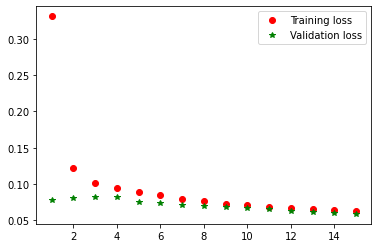

In [52]:
epochs = list(range(1, num_epochs+1))
plt.plot(epochs, train_losses, 'ro', label="Training loss")
plt.plot(epochs, valid_losses, 'g*', label="Validation loss")
plt.legend()
plt.show()

**Testing the model's accuracy**

In [53]:
with torch.set_grad_enabled(False):
    accuracy = 0.0
    for features, label in test_iterator:
      # transfer to GPU
      features = torch.concat(features).to(device)
      label = label.to(device)

      output = two_layer_nn1(features.float())

      predicted = torch.round(output)
      accuracy += (predicted == label).sum().item()

    print("Accuracy of the model based on " + str(len(test_iterator)) + " test samples: " + str(100 * accuracy/len(test_iterator)))

Accuracy of the model based on 28 test samples: 96.42857142857143


**Observations**

The **two-layer perceptron** model performed **very well**. Based on the training-validation curve, it seems that after 15 epochs it **converges** beautifully, so it was performing very satisfactorily on both training and validation data. It also scored very high accuracy: **96%**.

Our dataset was very small, there are only 112 samples for training, so to accomplish good results, **a good model is one which is able to generalize well**. This one certainly did.

It also seems that the **Mean Squared Error** metric contributed to quite **stable** results.

**Trained with Mean Absolute Error loss function:**

In [92]:
# initialize the NN to have 1 hidden layer
two_layer_nn2 = MultilayerPerceptron(4, 1, 3, 1)
print(two_layer_nn2)

# transfer model to GPU
two_layer_nn2.to(device)

# define loss function and optimizer (stochastic gradient descent)
loss_function = torch.nn.L1Loss()
optimizer = torch.optim.SGD(two_layer_nn2.parameters(), lr=0.01)

print("\nTraining the two-layer perceptron with MAE loss...\n")

num_epochs = 15

train_losses = []
valid_losses = []

# loop over epochs
for epoch in range(num_epochs):
  print("Starting epoch " + str(epoch + 1) + "...")
  train_loss = 0.0

  # training
  for features, label in train_iterator:
    # transfer to GPU
    features = torch.concat(features).to(device)
    label = label.to(device)

    # model computations

    # set gradients to 0 before calculating loss
    two_layer_nn2.zero_grad()

    # forward pass
    output = two_layer_nn2(features.float())

    # calculate the loss function
    loss = loss_function(output, label.float())

    # backpropagation, calculating gradients
    loss.backward()

    # update weights
    optimizer.step()

    train_loss += loss.item()

  print("Training loss = " + str(train_loss/len(train_iterator)))
  train_losses.append(train_loss/len(train_iterator))

  # validation
  with torch.set_grad_enabled(False):
    valid_loss = 0.0
    for features, label in validation_iterator:
      # transfer to GPU
      features = torch.concat(features).to(device)
      label = label.to(device)

      # model computations
      output = two_layer_nn2(features.float())
      loss = loss_function(output, label.float())

      valid_loss += loss.item()

    print("Validation loss = " + str(valid_loss/len(validation_iterator)))
    valid_losses.append(valid_loss/len(validation_iterator))

MultilayerPerceptron(
  (input_layer): Linear(in_features=4, out_features=3, bias=True)
  (hidden_layers): ModuleList(
    (0): Linear(in_features=3, out_features=3, bias=True)
  )
  (output_layer): Linear(in_features=3, out_features=1, bias=True)
)

Training the two-layer perceptron with MAE loss...

Starting epoch 1...
Training loss = 0.5814344228378364
Validation loss = 0.2700388580560684
Starting epoch 2...
Training loss = 0.2793390882600631
Validation loss = 0.2083013892173767
Starting epoch 3...
Training loss = 0.23710989393293858
Validation loss = 0.18174836933612823
Starting epoch 4...
Training loss = 0.24427837479327405
Validation loss = 0.2233034610748291
Starting epoch 5...
Training loss = 0.23904717074973242
Validation loss = 0.13327444791793824
Starting epoch 6...
Training loss = 0.2349440579169563
Validation loss = 0.24994919300079346
Starting epoch 7...
Training loss = 0.22236932627856731
Validation loss = 0.3288120567798615
Starting epoch 8...
Training loss = 0.21953046

**Plot the training-validation curve**

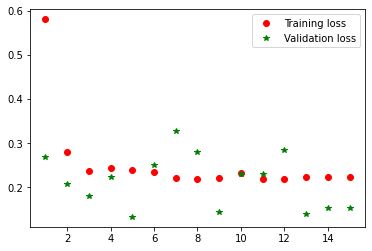

In [93]:
epochs = list(range(1, num_epochs+1))
plt.plot(epochs, train_losses, 'ro', label="Training loss")
plt.plot(epochs, valid_losses, 'g*', label="Validation loss")
plt.legend()
plt.show()

**Testing the model's accuracy**

In [94]:
with torch.set_grad_enabled(False):
    accuracy = 0.0
    for features, label in test_iterator:
      # transfer to GPU
      features = torch.concat(features).to(device)
      label = label.to(device)

      output = two_layer_nn2(features.float())

      predicted = torch.round(output)
      accuracy += (predicted == label).sum().item()

    print("Accuracy of the model based on " + str(len(test_iterator)) + " test samples: " + str(100 * accuracy/len(test_iterator)))

Accuracy of the model based on 28 test samples: 92.85714285714286


**Observations**

The second two-layer perceptron is trained using a different loss function - **Mean Absolute Error**, and it is visible right from first looking at the training-validation curve, as well as the accuracy, that this option yields more **unstable** results. The training loss decreases, but becomes stagnant after dropping to about 0.2. The validation loss does not follow any sensible pattern, so the model is not handling unobserved samples well.

The accuracy is a bit lower than in case of MSE, but still not bad - **92.9%**.

The reason why **MSE** proved to yield better results than **MAE** may be that because MSE uses a squared value - **any large deviations from the target value are heavily penalized**.



## Three-layer perceptron

Input layer -> hidden layer -> hidden layer -> output layer

**Trained with Mean Squared Error loss function:**

In [60]:
# initialize the NN to have 2 hidden layers
three_layer_nn1 = MultilayerPerceptron(4, 2, 3, 1)
print(three_layer_nn1)

# transfer model to GPU
three_layer_nn1.to(device)

# define loss function and optimizer (stochastic gradient descent)
loss_function = torch.nn.MSELoss()
optimizer = torch.optim.SGD(three_layer_nn1.parameters(), lr=0.01)\

print("\nTraining the three-layer perceptron with MSE loss...\n")

num_epochs = 15

train_losses = []
valid_losses = []

# loop over epochs
for epoch in range(num_epochs):
  print("Starting epoch " + str(epoch + 1) + "...")
  train_loss = 0.0

  # training
  for features, label in train_iterator:
    # transfer to GPU
    features = torch.concat(features).to(device)
    label = label.to(device)

    # model computations

    # set gradients to 0 before calculating loss
    three_layer_nn1.zero_grad()

    # forward pass
    output = three_layer_nn1(features.float())

    # calculate the loss function
    loss = loss_function(output, label.float())

    # backpropagate
    loss.backward()

    # update weights
    optimizer.step()

    train_loss += loss.item()

  print("Training loss = " + str(train_loss/len(train_iterator)))
  train_losses.append(train_loss/len(train_iterator))

  # validation
  with torch.set_grad_enabled(False):
    valid_loss = 0.0
    for features, label in validation_iterator:
      # transfer to GPU
      features = torch.concat(features).to(device)
      label = label.to(device)

      # model computations
      output = three_layer_nn1(features.float())
      loss = loss_function(output, label.float())

      valid_loss += loss.item()

    print("Validation loss = " + str(valid_loss/len(validation_iterator)))
    valid_losses.append(valid_loss/len(validation_iterator))

MultilayerPerceptron(
  (input_layer): Linear(in_features=4, out_features=3, bias=True)
  (hidden_layers): ModuleList(
    (0): Linear(in_features=3, out_features=3, bias=True)
    (1): Linear(in_features=3, out_features=3, bias=True)
  )
  (output_layer): Linear(in_features=3, out_features=1, bias=True)
)

Training the three-layer perceptron with MSE loss...

Starting epoch 1...
Training loss = 0.6383804970771182
Validation loss = 0.28213832250912674
Starting epoch 2...
Training loss = 0.2506431064620642
Validation loss = 0.08813927117735147
Starting epoch 3...
Training loss = 0.1314592558570991
Validation loss = 0.11015951464651152
Starting epoch 4...
Training loss = 0.11723326247772548
Validation loss = 0.11963264919904759
Starting epoch 5...
Training loss = 0.10676166445179344
Validation loss = 0.1308299603580963
Starting epoch 6...
Training loss = 0.09609459767934934
Validation loss = 0.14456666345940902
Starting epoch 7...
Training loss = 0.0907893219319545
Validation loss = 0.15

**Plot the training-validation curve**

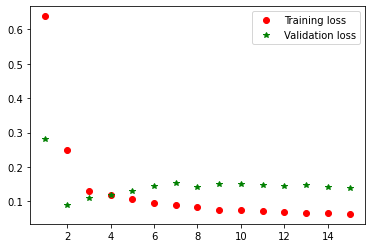

In [61]:
epochs = list(range(1, num_epochs+1))
plt.plot(epochs, train_losses, 'ro', label="Training loss")
plt.plot(epochs, valid_losses, 'g*', label="Validation loss")
plt.legend()
plt.show()

**Testing the model's accuracy**

In [62]:
with torch.set_grad_enabled(False):
    accuracy = 0.0
    for features, label in test_iterator:
      # transfer to GPU
      features = torch.concat(features).to(device)
      label = label.to(device)

      output = three_layer_nn1(features.float())
      loss = loss_function(output, label.float())

      predicted = torch.round(output)
      accuracy += (predicted == label).sum().item()

    print("Accuracy of the model based on " + str(len(test_iterator)) + " test samples: " + str(100 * accuracy/len(test_iterator)))

Accuracy of the model based on 28 test samples: 92.85714285714286


**Observations**

The **three-layer perceptron** seemed to learn how to generalize data well very fast. It **converged after just 4 epoch**s, so at that point it would have potential to be an acceptable model. However, **after those 4 epochs** the model started **overfitting**, so the **number of layers became too much for current problem's complexity**. It lost its generalization ability. However, the accuracy is still not bad - **92.9%**.

**Trained with Mean Absolute Error loss function:**

In [63]:
# initialize the NN to have 2 hidden layers
three_layer_nn2 = MultilayerPerceptron(4, 2, 3, 1)
print(three_layer_nn2)

# transfer model to GPU
three_layer_nn2.to(device)

# define loss function and optimizer (stochastic gradient descent)
loss_function = torch.nn.L1Loss()
optimizer = torch.optim.SGD(three_layer_nn2.parameters(), lr=0.01)\

print("\nTraining the three-layer perceptron with MAE loss...\n")

num_epochs = 15

train_losses = []
valid_losses = []

# loop over epochs
for epoch in range(num_epochs):
  print("Starting epoch " + str(epoch + 1) + "...")
  train_loss = 0.0

  # training
  for features, label in train_iterator:
    # transfer to GPU
    features = torch.concat(features).to(device)
    label = label.to(device)

    # model computations

    # set gradients to 0 before calculating loss
    three_layer_nn2.zero_grad()

    # forward pass
    output = three_layer_nn2(features.float())

    # calculate the loss function
    loss = loss_function(output, label.float())

    # backpropagate
    loss.backward()

    # update weights
    optimizer.step()

    train_loss += loss.item()

  print("Training loss = " + str(train_loss/len(train_iterator)))
  train_losses.append(train_loss/len(train_iterator))

  # validation
  with torch.set_grad_enabled(False):
    valid_loss = 0.0
    for features, label in validation_iterator:
      # transfer to GPU
      features = torch.concat(features).to(device)
      label = label.to(device)

      # model computations
      output = three_layer_nn2(features.float())
      loss = loss_function(output, label.float())

      valid_loss += loss.item()

    print("Validation loss = " + str(valid_loss/len(validation_iterator)))
    valid_losses.append(valid_loss/len(validation_iterator))

MultilayerPerceptron(
  (input_layer): Linear(in_features=4, out_features=3, bias=True)
  (hidden_layers): ModuleList(
    (0): Linear(in_features=3, out_features=3, bias=True)
    (1): Linear(in_features=3, out_features=3, bias=True)
  )
  (output_layer): Linear(in_features=3, out_features=1, bias=True)
)

Training the three-layer perceptron with MAE loss...

Starting epoch 1...
Training loss = 0.7172680202472422
Validation loss = 0.29666553139686586
Starting epoch 2...
Training loss = 0.39103851966293796
Validation loss = 0.20042220503091812
Starting epoch 3...
Training loss = 0.2756162337692721
Validation loss = 0.17516628950834273
Starting epoch 4...
Training loss = 0.2572048598168684
Validation loss = 0.12779828161001205
Starting epoch 5...
Training loss = 0.24768082298604505
Validation loss = 0.16436545103788375
Starting epoch 6...
Training loss = 0.24503963869730278
Validation loss = 0.12701896578073502
Starting epoch 7...
Training loss = 0.23356454875985427
Validation loss = 0.

**Plot the training-validation curve**

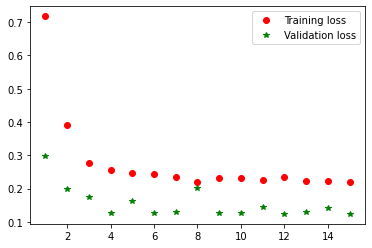

In [64]:
epochs = list(range(1, num_epochs+1))
plt.plot(epochs, train_losses, 'ro', label="Training loss")
plt.plot(epochs, valid_losses, 'g*', label="Validation loss")
plt.legend()
plt.show()

**Testing the model's accuracy**

In [65]:
with torch.set_grad_enabled(False):
    accuracy = 0.0
    for features, label in test_iterator:
      # transfer to GPU
      features = torch.concat(features).to(device)
      label = label.to(device)

      output = three_layer_nn2(features.float())
      loss = loss_function(output, label.float())

      predicted = torch.round(output)
      accuracy += (predicted == label).sum().item()

    print("Accuracy of the model based on " + str(len(test_iterator)) + " test samples: " + str(100 * accuracy/len(test_iterator)))

Accuracy of the model based on 28 test samples: 89.28571428571429


**Observations**

The second **three-layer perceptron**, trained with MAE loss function, again yielded worse results than the one trained with MSE.

As shown on the training-validation curve, the model **failed to converge** during 15 epochs and scored an **89%** accuracy.

So again, as the first three-layer perceptron, it may be that the complexity of the network is too large for current problem's complexity.

## Four level perceptron

Input layer -> hidden layer -> hidden layer -> hidden layer -> output layer

**Trained with Mean Squared Error loss function:**

In [66]:
# initialize the NN to have 3 hidden layers
four_layer_nn1 = MultilayerPerceptron(4, 3, 3, 1)
print(four_layer_nn1)

# transfer model to GPU
four_layer_nn1.to(device)

# define loss function and optimizer (stochastic gradient descent)
loss_function = torch.nn.MSELoss()
optimizer = torch.optim.SGD(four_layer_nn1.parameters(), lr=0.01)

print("\nTraining the four-layer perceptron with MSE loss...\n")

num_epochs = 15

train_losses = []
valid_losses = []

# loop over epochs
for epoch in range(num_epochs):
  print("Starting epoch " + str(epoch + 1) + "...")
  train_loss = 0.0

  # training
  for features, label in train_iterator:
    # transfer to GPU
    features = torch.concat(features).to(device)
    label = label.to(device)

    # model computations

    # set gradients to 0 before calculating loss
    four_layer_nn1.zero_grad()

    # forward pass
    output = four_layer_nn1(features.float())

    loss = loss_function(output, label.float())

    loss.backward()

    optimizer.step()

    train_loss += loss.item()

  print("Training loss = " + str(train_loss/len(train_iterator)))
  train_losses.append(train_loss/len(train_iterator))

  # validation
  with torch.set_grad_enabled(False):
    valid_loss = 0.0
    for features, label in validation_iterator:
      # transfer to GPU
      features = torch.concat(features).to(device)
      label = label.to(device)

      # model computations
      output = four_layer_nn1(features.float())
      loss = loss_function(output, label.float())

      valid_loss += loss.item()

    print("Validation loss = " + str(valid_loss/len(validation_iterator)))
    valid_losses.append(valid_loss/len(validation_iterator))

MultilayerPerceptron(
  (input_layer): Linear(in_features=4, out_features=3, bias=True)
  (hidden_layers): ModuleList(
    (0): Linear(in_features=3, out_features=3, bias=True)
    (1): Linear(in_features=3, out_features=3, bias=True)
    (2): Linear(in_features=3, out_features=3, bias=True)
  )
  (output_layer): Linear(in_features=3, out_features=1, bias=True)
)

Training the four-layer perceptron with MSE loss...

Starting epoch 1...
Training loss = 1.1635109783580577
Validation loss = 0.45350931528955696
Starting epoch 2...
Training loss = 0.6977145188315603
Validation loss = 0.4587149902712554
Starting epoch 3...
Training loss = 0.6967986928148743
Validation loss = 0.45987345310859384
Starting epoch 4...
Training loss = 0.6962317282504306
Validation loss = 0.46100258617661893
Starting epoch 5...
Training loss = 0.695686765706796
Validation loss = 0.4621101112104952
Starting epoch 6...
Training loss = 0.6951612423304466
Validation loss = 0.46319714314304294
Starting epoch 7...
Train

**Plot the training-validation curve**

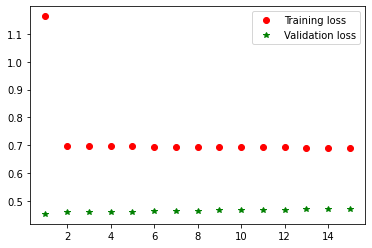

In [67]:
epochs = list(range(1, num_epochs+1))
plt.plot(epochs, train_losses, 'ro', label="Training loss")
plt.plot(epochs, valid_losses, 'g*', label="Validation loss")
plt.legend()
plt.show()

**Testing the model's accuracy**

In [68]:
with torch.set_grad_enabled(False):
    accuracy = 0.0
    for features, label in test_iterator:
      # transfer to GPU
      features = torch.concat(features).to(device)
      label = label.to(device)

      output = four_layer_nn1(features.float())

      predicted = torch.round(output)
      
      accuracy += (predicted == label).sum().item()

    print("Accuracy of the model based on " + str(len(test_iterator)) + " test samples: " + str(100 * accuracy/len(test_iterator)))

Accuracy of the model based on 28 test samples: 28.571428571428573


**Observations**

When we start observing perceptrons with **3 hidden layers or more**, the **negative effect** of increased number of hidden layers on the **current problem** becomes quite transparent.

The model did not manage to learn how to generalize at all and for all samples it predicts the same value which is right only in **28%** of the time, as scored accuracy shows.

**Trained with Mean Absolute Error loss function:**

In [69]:
# initialize the NN to have 3 hidden layers
four_layer_nn2 = MultilayerPerceptron(4, 3, 3, 1)
print(four_layer_nn2)

# transfer model to GPU
four_layer_nn2.to(device)

# define loss function and optimizer (stochastic gradient descent)
loss_function = torch.nn.L1Loss()
optimizer = torch.optim.SGD(four_layer_nn2.parameters(), lr=0.01)

print("\nTraining the four-layer perceptron with MAE loss...\n")

num_epochs = 15

train_losses = []
valid_losses = []

# loop over epochs
for epoch in range(num_epochs):
  print("Starting epoch " + str(epoch + 1) + "...")
  train_loss = 0.0

  # training
  for features, label in train_iterator:
    # transfer to GPU
    features = torch.concat(features).to(device)
    label = label.to(device)

    # model computations

    # set gradients to 0 before calculating loss
    four_layer_nn2.zero_grad()

    # forward pass
    output = four_layer_nn2(features.float())

    loss = loss_function(output, label.float())

    loss.backward()

    optimizer.step()

    train_loss += loss.item()

  print("Training loss = " + str(train_loss/len(train_iterator)))
  train_losses.append(train_loss/len(train_iterator))

  # validation
  with torch.set_grad_enabled(False):
    valid_loss = 0.0
    for features, label in validation_iterator:
      # transfer to GPU
      features = torch.concat(features).to(device)
      label = label.to(device)

      # model computations
      output = four_layer_nn2(features.float())
      loss = loss_function(output, label.float())

      valid_loss += loss.item()

    print("Validation loss = " + str(valid_loss/len(validation_iterator)))
    valid_losses.append(valid_loss/len(validation_iterator))

MultilayerPerceptron(
  (input_layer): Linear(in_features=4, out_features=3, bias=True)
  (hidden_layers): ModuleList(
    (0): Linear(in_features=3, out_features=3, bias=True)
    (1): Linear(in_features=3, out_features=3, bias=True)
    (2): Linear(in_features=3, out_features=3, bias=True)
  )
  (output_layer): Linear(in_features=3, out_features=1, bias=True)
)

Training the four-layer perceptron with MAE loss...

Starting epoch 1...
Training loss = 0.9620866047750626
Validation loss = 0.5660091161727905
Starting epoch 2...
Training loss = 0.7041806748935154
Validation loss = 0.5050746977329255
Starting epoch 3...
Training loss = 0.6820456135485854
Validation loss = 0.5071509420871735
Starting epoch 4...
Training loss = 0.6818227512495858
Validation loss = 0.5091474413871765
Starting epoch 5...
Training loss = 0.6822800455348832
Validation loss = 0.5014684975147248
Starting epoch 6...
Training loss = 0.6817054258925574
Validation loss = 0.5034299314022064
Starting epoch 7...
Training

**Plot the training-validation curve**

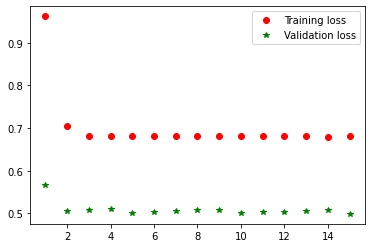

In [70]:
epochs = list(range(1, num_epochs+1))
plt.plot(epochs, train_losses, 'ro', label="Training loss")
plt.plot(epochs, valid_losses, 'g*', label="Validation loss")
plt.legend()
plt.show()

**Testing the model's accuracy**

In [71]:
with torch.set_grad_enabled(False):
    accuracy = 0.0
    for features, label in test_iterator:
      # transfer to GPU
      features = torch.concat(features).to(device)
      label = label.to(device)

      output = four_layer_nn2(features.float())

      predicted = torch.round(output)
      accuracy += (predicted == label).sum().item()

    print("Accuracy of the model based on " + str(len(test_iterator)) + " test samples: " + str(100 * accuracy/len(test_iterator)))

Accuracy of the model based on 28 test samples: 28.571428571428573


**Observations**

This perceptron performed approximately the same as the first four-layer one. Here, the change in loss function did not make a different, because the main issue was that the network is too complex and did not manage to learn anything from provided input data.

## Five-layer perceptron

Input layer -> hidden layer -> hidden layer -> hidden layer -> hidden layer -> output layer

**Trained with Mean Squared Error loss function:**

In [72]:
# initialize the NN to have 4 hidden layers
five_layer_nn1 = MultilayerPerceptron(4, 4, 3, 1)
print(five_layer_nn1)

# transfer model to GPU
five_layer_nn1.to(device)

# define loss function and optimizer (stochastic gradient descent)
loss_function = torch.nn.MSELoss()
optimizer = torch.optim.SGD(five_layer_nn1.parameters(), lr=0.01)

print("\nTraining the five-layer perceptron with MSE loss...\n")

num_epochs = 15

train_losses = []
valid_losses = []

# loop over epochs
for epoch in range(num_epochs):
  print("Starting epoch " + str(epoch + 1) + "...")
  train_loss = 0.0

  # training
  for features, label in train_iterator:
    # transfer to GPU
    features = torch.concat(features).to(device)
    label = label.to(device)

    # model computations

    # set gradients to 0 before calculating loss
    five_layer_nn1.zero_grad()

    # forward pass
    output = five_layer_nn1(features.float())

    loss = loss_function(output, label.float())

    loss.backward()

    optimizer.step()

    train_loss += loss.item()

  print("Training loss = " + str(train_loss/len(train_iterator)))
  train_losses.append(train_loss/len(train_iterator))

  # validation
  with torch.set_grad_enabled(False):
    valid_loss = 0.0
    for features, label in validation_iterator:
      # transfer to GPU
      features = torch.concat(features).to(device)
      label = label.to(device)

      # model computations
      output = five_layer_nn1(features.float())
      loss = loss_function(output, label.float())

      valid_loss += loss.item()

    print("Validation loss = " + str(valid_loss/len(validation_iterator)))
    valid_losses.append(valid_loss/len(validation_iterator))

MultilayerPerceptron(
  (input_layer): Linear(in_features=4, out_features=3, bias=True)
  (hidden_layers): ModuleList(
    (0): Linear(in_features=3, out_features=3, bias=True)
    (1): Linear(in_features=3, out_features=3, bias=True)
    (2): Linear(in_features=3, out_features=3, bias=True)
    (3): Linear(in_features=3, out_features=3, bias=True)
  )
  (output_layer): Linear(in_features=3, out_features=1, bias=True)
)

Training the five-layer perceptron with MSE loss...

Starting epoch 1...
Training loss = 0.7710545982595411
Validation loss = 0.47420517131686213
Starting epoch 2...
Training loss = 0.6876925140625028
Validation loss = 0.4820632547372952
Starting epoch 3...
Training loss = 0.6870002369872898
Validation loss = 0.4826560513873119
Starting epoch 4...
Training loss = 0.686823011810426
Validation loss = 0.48310286850319245
Starting epoch 5...
Training loss = 0.6866575004525137
Validation loss = 0.4835417335329112
Starting epoch 6...
Training loss = 0.6864947869375035
Valida

**Plot the training-validation curve**

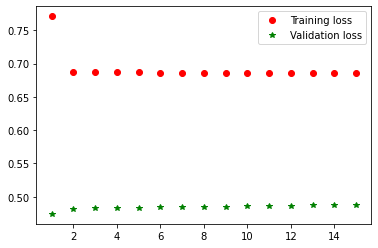

In [73]:
epochs = list(range(1, num_epochs+1))
plt.plot(epochs, train_losses, 'ro', label="Training loss")
plt.plot(epochs, valid_losses, 'g*', label="Validation loss")
plt.legend()
plt.show()

**Testing the model's accuracy**

In [74]:
with torch.set_grad_enabled(False):
    accuracy = 0.0
    for features, label in test_iterator:
      # transfer to GPU
      features = torch.concat(features).to(device)
      label = label.to(device)

      output = five_layer_nn1(features.float())

      predicted = torch.round(output)
      accuracy += (predicted == label).sum().item()

    print("Accuracy of the model based on " + str(len(test_iterator)) + " test samples: " + str(100 * accuracy/len(test_iterator)))

Accuracy of the model based on 28 test samples: 28.571428571428573


**Trained with Mean Absolute Error loss function:**

In [75]:
# initialize the NN to have 4 hidden layers
five_layer_nn2 = MultilayerPerceptron(4, 4, 3, 1)
print(five_layer_nn2)

# transfer model to GPU
five_layer_nn2.to(device)

# define loss function and optimizer (stochastic gradient descent)
loss_function = torch.nn.L1Loss()
optimizer = torch.optim.SGD(five_layer_nn2.parameters(), lr=0.01)

print("\nTraining the five-layer perceptron with MAE loss...\n")

num_epochs = 15

train_losses = []
valid_losses = []

# loop over epochs
for epoch in range(num_epochs):
  print("Starting epoch " + str(epoch + 1) + "...")
  train_loss = 0.0

  # training
  for features, label in train_iterator:
    # transfer to GPU
    features = torch.concat(features).to(device)
    label = label.to(device)

    # model computations

    # set gradients to 0 before calculating loss
    five_layer_nn2.zero_grad()

    # forward pass
    output = five_layer_nn2(features.float())

    loss = loss_function(output, label.float())

    loss.backward()

    optimizer.step()

    train_loss += loss.item()

  print("Training loss = " + str(train_loss/len(train_iterator)))
  train_losses.append(train_loss/len(train_iterator))

  # validation
  with torch.set_grad_enabled(False):
    valid_loss = 0.0
    for features, label in validation_iterator:
      # transfer to GPU
      features = torch.concat(features).to(device)
      label = label.to(device)

      # model computations
      output = five_layer_nn2(features.float())
      loss = loss_function(output, label.float())

      valid_loss += loss.item()

    print("Validation loss = " + str(valid_loss/len(validation_iterator)))
    valid_losses.append(valid_loss/len(validation_iterator))

MultilayerPerceptron(
  (input_layer): Linear(in_features=4, out_features=3, bias=True)
  (hidden_layers): ModuleList(
    (0): Linear(in_features=3, out_features=3, bias=True)
    (1): Linear(in_features=3, out_features=3, bias=True)
    (2): Linear(in_features=3, out_features=3, bias=True)
    (3): Linear(in_features=3, out_features=3, bias=True)
  )
  (output_layer): Linear(in_features=3, out_features=1, bias=True)
)

Training the five-layer perceptron with MAE loss...

Starting epoch 1...
Training loss = 1.0450096257929025
Validation loss = 0.6383118271827698
Starting epoch 2...
Training loss = 0.8598983311759574
Validation loss = 0.5503119230270386
Starting epoch 3...
Training loss = 0.7028342229979379
Validation loss = 0.5023119688034058
Starting epoch 4...
Training loss = 0.6746428523744855
Validation loss = 0.5023119688034058
Starting epoch 5...
Training loss = 0.6746428523744855
Validation loss = 0.5023119688034058
Starting epoch 6...
Training loss = 0.6746428523744855
Validat

**Plot the training-validation curve**

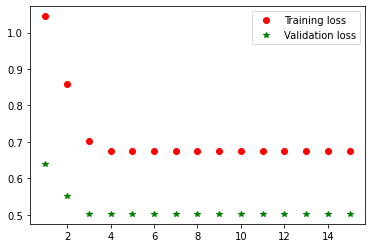

In [76]:
epochs = list(range(1, num_epochs+1))
plt.plot(epochs, train_losses, 'ro', label="Training loss")
plt.plot(epochs, valid_losses, 'g*', label="Validation loss")
plt.legend()
plt.show()

**Testing the model's accuracy**

In [77]:
with torch.set_grad_enabled(False):
    accuracy = 0.0
    for features, label in test_iterator:
      # transfer to GPU
      features = torch.concat(features).to(device)
      label = label.to(device)

      output = five_layer_nn2(features.float())

      predicted = torch.round(output)
      accuracy += (predicted == label).sum().item()

    print("Accuracy of the model based on " + str(len(test_iterator)) + " test samples: " + str(100 * accuracy/len(test_iterator)))

Accuracy of the model based on 28 test samples: 28.571428571428573


**Observations**

Same as in four-layer perceptrons.

# Final conclusions

We have tested neural networks with different numbers of hidden layers in them. In general, it seems that the smaller nets perform better in this particular task.

Validation during training allows us to see how well the network generalizes the problem - so how it performs on new samples which were not analyzed by the model before. It seems that smaller nets (with 1 or 2 hidden layers) have managed to generalize well.

On the other hand, larger nets did not seem to grasp the problem effectively. The networks with more than 4 layers (so more than 3 hidden layers) predict the same value for all samples and thus their accuracies are very low (unless the test data is not balanced and happens to have majority of samples belonging to the class which is the closest to the model's assumed prediction value).

**Effects of the number of perceptron layers on final metrics depend on the problem complexity.** In our case, the provided data was really incomplex - there were only 4 input features and 112 training samples, so there was no space for the large models to deeply study the data. **Networks with more layers were too complex for this incomplex task.** However, if we had a very complex dataset with lots of intricate details and differences - a deeper network given more time to train would probably accomplish very satisfactory results.